epoch = 10, loss= 4475.75048828125, w= 11.41154670715332
epoch = 20, loss= 3335.8779296875, w= 21.867843627929688
epoch = 30, loss= 2511.6337890625, w= 30.77713966369629
epoch = 40, loss= 1914.958740234375, w= 38.36988067626953
epoch = 50, loss= 1482.576416015625, w= 44.841915130615234
epoch = 60, loss= 1168.9505615234375, w= 50.359703063964844
epoch = 70, loss= 941.2630615234375, w= 55.06481170654297
epoch = 80, loss= 775.8308715820312, w= 59.07763671875
epoch = 90, loss= 655.5419311523438, w= 62.500614166259766
epoch = 100, loss= 568.0173950195312, w= 65.42091369628906


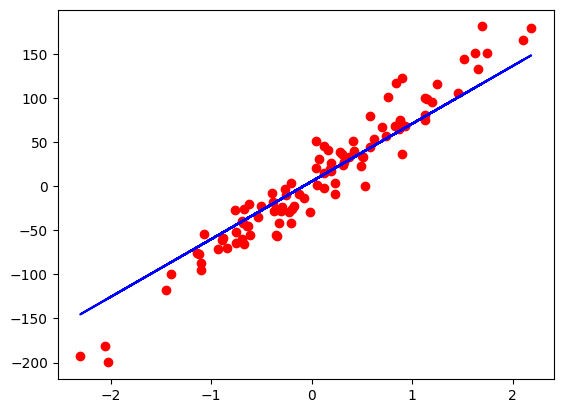

In [26]:
#pytorch pipeline
# 1) Design model(input, output size, forward prop)
# 2) Contruct loss and optimizer
# 3) training loop
# -> forward prop= prediction and loss
# -> gradients = backward prop
# -> update weights


import torch 
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) prepare the data
X_numpy, y_numpy = datasets.make_regression(n_samples=100,n_features=1, noise=20, random_state=1)  #we are making random regression dataset from sklearn
X = torch.from_numpy(X_numpy.astype(np.float32)) #since this is in double, we need to convert it into a float otherwise we will run into error
Y = torch.from_numpy(y_numpy.astype(np.float32))


#so we need to reshape our tensor to 1 column and we do this for Y only bcs X is already a vector
Y = Y.view(Y.shape[0],1)  #since we want every value as an array
n_samples, n_features = X.shape


# 1) design the model

input_size = n_features  
output_size = 1   # 1 bcz we need only one value as output. It is not equal to n_features actually.
model = nn.Linear(input_size,output_size)


# 2) loss and optimizer

learning_rate=0.01
iterations= 100
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr = learning_rate)  #torch's optimizer SGD -> stochastic gradient descent

# 3) training loop
for epoch in range(iterations):
  #forward prop = prediction
  y_pred = model(X)   # we pass X here to train the model on our previous data

  #loss
  l = criterion(Y,y_pred)

  #gradient
  l.backward()

  #update weights
  optimizer.step()

  #zero gradients
  optimizer.zero_grad()   # we need to make optimizer equal to zero grad. bcz it will make gradients of all optimised torch tensors equal to zero. 

  [w,b] = model.parameters()

  if((epoch+1)%10==0):
    print(f'epoch = {epoch+1}, loss= {l.item()}, w= {w[0,0]}')

#plotting this
predicted = model(X).detach().numpy() #we need to convert it into numpy package back, and before that we need too use detach() to prevent this operation from being tracked in our graph 
plt.plot(X_numpy,y_numpy,'ro') #we are plotting our original dataset
plt.plot(X_numpy,predicted,'b')  #we are plotting the predicted data to the dataset provided
plt.show()
